import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.pyplot import MultipleLocator

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.pyplot import MultipleLocator

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model
from sklearn.decomposition import PCA

In [3]:
train = pd.read_csv('./Periodic/train.csv')
# Drop the time stamp column
test = pd.read_csv('./Periodic/test.csv')
train= train.loc[:, (train != 0).any(axis=0)]
#test=???

In [4]:
train

,Unnamed: 0,TimeStamp,0_all_..usr,0_all_..sys,0_all_..iowait,0_all_..soft,0_all_..idle,0_cpu0_.usr,0_cpu0_.sys,0_cpu0_.iowait,...,40_RxPacktes.1,40_TxPacktes.1,40_RxBytes.1,40_TxBytes.1,41_RxPacktes.1,41_TxPacktes.1,41_RxBytes.1,41_TxBytes.1,ReadsAvg,WritesAvg
0,0,2016-11-20 07:13:51,2.23,0.55,0.42,0.08,96.72,2.02,0.00,1.01,...,296,365,174976,193695,367,296,121659,293712,73.8254,175.5445
1,3,2016-11-20 07:14:02,3.35,0.75,2.76,0.17,92.97,3.92,0.98,0.98,...,2957,3579,1619376,2006284,3565,2927,1286837,2663940,56.9347,108.4472
2,6,2016-11-20 07:14:05,3.89,0.96,3.43,0.13,91.58,0.00,0.00,4.12,...,2719,3464,1521516,2071803,3463,2740,1311750,2596759,58.3944,107.6670
3,8,2016-11-20 07:14:10,1.46,0.63,1.80,0.13,95.99,1.02,0.00,2.04,...,5081,6497,1949522,2803562,6486,5090,1819787,2839599,59.4581,120.0390
4,9,2016-11-20 07:14:11,0.75,0.25,1.05,0.04,97.91,1.00,0.00,0.00,...,3951,4591,1854630,2411463,4590,3951,1545479,3048829,55.9895,114.3459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10131,28955,2016-11-20 19:42:03,0.08,0.08,0.00,0.00,99.83,0.00,0.00,0.00,...,934,1361,489817,541623,1369,934,440170,605657,53.6099,105.9537
10132,28956,2016-11-20 19:42:05,0.17,0.04,0.00,0.00,99.79,0.00,0.00,0.00,...,274,345,187430,154210,346,274,97798,310510,55.5818,109.0576
10133,28957,2016-11-20 19:42:06,0.13,0.21,0.04,0.00,99.62,0.00,0.00,1.01,...,291,389,179191,196811,389,291,122963,296479,55.6183,107.0251
10134,28958,2016-11-20 19:42:12,0.04,0.13,0.04,0.00,99.79,0.00,0.00,1.00,...,296,369,196312,175558,375,305,110806,332621,52.6730,104.5830


In [5]:
train_ = train.drop("TimeStamp",1)
test_= train.drop("TimeStamp",1)

In [6]:
# Extract X,Y components from test and train sets
X_train = train.drop("TimeStamp",1)
X_train = X_train.drop("ReadsAvg",1)
X_train = X_train.drop("WritesAvg",1)
X_test = test.drop("TimeStamp",1)
X_test = X_test.drop("ReadsAvg",1)
X_test = X_test.drop("WritesAvg",1)
Y_train_r = train["ReadsAvg"]
#Y_train_w = train["WritesAvg"]
Y_test_r = test["ReadsAvg"]
#Y_test_w = test["WritesAvg"]

In [7]:
### generate PCA

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



X_train_r= StandardScaler().fit_transform(X_train)
X_test_r = StandardScaler().fit_transform(X_test)
X_train_pca = pca.fit_transform(X_train_r)[:,:]
X_test_pca= pca.fit_transform(X_test_r)[:,:]

In [18]:
pca_time=[]
klist=[1,2,4,8,16,32,64,128,256,512,1024]
for k in klist:
    time_start=time.time()
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_r)[:,:]
    X_test_pca= pca.fit_transform(X_test_r)[:,:]
    time_end=time.time()
    pca_time.append(time_end-time_start)
pca_time

[1.0372276306152344,
 1.1248080730438232,
 1.024261713027954,
 1.0611612796783447,
 1.1692614555358887,
 1.4422893524169922,
 1.9639332294464111,
 3.1107635498046875,
 3.71885085105896,
 8.80467438697815,
 18.104601860046387]

In [20]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_r)[:,:]
X_test_pca= pca.fit_transform(X_test_r)[:,:]
X_train_pca

array([[ 14.7146984 ],
       [ 10.02519409],
       [ 14.08897384],
       ...,
       [-40.03341619],
       [-42.86843453],
       [-43.51130637]])

In [21]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_r)[:,:]
X_test_pca= pca.fit_transform(X_test_r)[:,:]
X_train_pca

array([[ 14.71469804,  37.58958985],
       [ 10.02519475,  23.63878252],
       [ 14.08897484,  24.30241419],
       ...,
       [-40.03341614, -14.10013039],
       [-42.86843451, -13.74095742],
       [-43.51130636, -14.04605696]])

### Read files

In [2]:
#  Pearson correlation
pc = pd.read_csv('./Periodic/read_p_c.csv')
pc_f= pc.iloc[2:,0].tolist()
X_train_pc=X_train[pc_f]
X_test_pc=X_test[pc_f]
pc_nmae=[]
pc_time=[]

# tree based
tb = pd.read_csv('./Periodic/read_t_b.csv')
tb_f=tb.iloc[0:,0].tolist()
X_train_tb=X_train[tb_f]
X_test_tb=X_test[tb_f]
tb_nmae=[]
tb_time=[]

# ARR
arr = pd.read_csv('./Periodic/read_arr.csv')
arr_f=arr.iloc[0:,0].tolist()
X_train_arr=X_train[arr_f]
X_test_arr=X_test[arr_f]
arr_nmae=[]
arr_time=[]


NameError: name 'X_train' is not defined

### Pearson correlation, tree based, ARR

In [11]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model

In [12]:
def fit_RF_reg(X,Y,X_test,Y_test):
    start_time = time.time()
    
    rfr = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 10,verbose = 0)
    rfr.fit(X, Y)
    
    end_time = time.time()
    timec=end_time - start_time

    NMAE=np.mean(np.abs(rfr.predict(X_test) - Y_test))/np.mean(Y_test)
    #R_squared = model_k.score(X,Y)
    return NMAE, timec

In [13]:
klist=[1,2,4,8,16,32,64,128,256,512,1024]

def RF_training_f(klist,X_train_f,Y_train_r,X_test_f,Y_test_r,nmae,training_t):
    for k in klist:
        error,timec = fit_RF_reg(X_train_f.iloc[:,0:k],Y_train_r,X_test_f.iloc[:,0:k],Y_test_r)
        nmae.append(error)
        training_t.append(timec)

In [14]:
r_pc_nmae=[]
r_pc_time=[]
RF_training_f(klist,X_train_pc,Y_train_r,X_test_pc,Y_test_r,r_pc_nmae,r_pc_time)

In [15]:
r_tb_nmae=[]
r_tb_time=[]
RF_training_f(klist,X_train_tb,Y_train_r,X_test_tb,Y_test_r, r_tb_nmae,r_tb_time)

In [16]:
r_arr_nmae=[]
r_arr_time=[]
RF_training_f(klist,X_train_arr,Y_train_r,X_test_arr,Y_test_r, r_arr_nmae,r_arr_time)

#### PCA

In [21]:
def RF_training_pca(klist,X_train_f,Y_train_r,X_test_f,Y_test_r,nmae,training_t):
    #for k in klist:
    for k in klist:
        error,timec = fit_RF_reg(X_train_f[:,0:k],Y_train_r,X_test_f[:,0:k],Y_test_r)
        nmae.append(error)
        training_t.append(timec)

r_pca_nmae=[]
r_pca_time=[]
RF_training_pca(klist ,X_train_pca,Y_train_r,X_test_pca,Y_test_r, r_pca_nmae,r_pca_time)

### Plot

<ipython-input-22-b6f7fa64114a>:38: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale("log",basex=2)


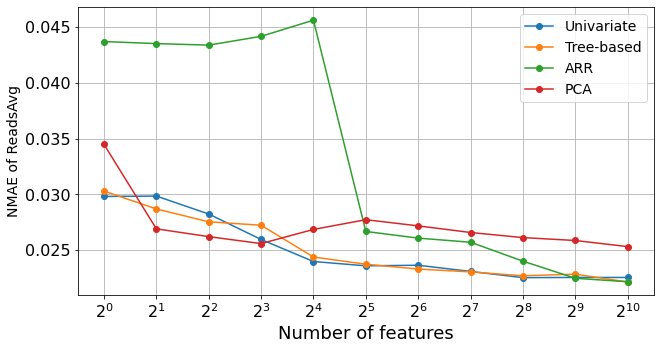

In [22]:
#a=[1, 2,3, 4, 5,6,7,8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,     32,40,48,56,64,  96,128,192,256,512,1024]
'''
a = [0,1,3,7,9,11,15,19,21,23,24,25,26,27,28,29]

def sortindex(list,indexs):
    _ = []
    for a in indexs:
        _.append(list[a])
    return _
'''

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist,r_pc_nmae,marker='o')
plt.plot(klist,r_tb_nmae,marker='o')
plt.plot(klist,r_arr_nmae,marker='o')
plt.plot(klist,r_pca_nmae,marker='o')
#plt.plot(sortindex(klist,a),sortindex(r_pc_nmae,a),marker='o')
#plt.plot(sortindex(klist,a),sortindex(r_tb_nmae,a),marker='o')
#plt.plot(sortindex(klist,a),sortindex(r_arr_nmae,a),marker='o')
#plt.plot(sortindex(klist,a),sortindex(r_pca_nmae,a),marker='o')


font_size=18
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('NMAE of ReadsAvg', fontsize=font_size-4)
plt.legend(('Univariate','Tree-based','ARR','PCA'), 
           loc=1, shadow=False, fancybox=True, fontsize=font_size-4)
#  bbox_to_anchor=(1.01,1.0), borderaxespad = 0.,
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(8)
ax=plt.gca()
#ax.xaxis.set_major_locator(x_major_locator)

ax.set_xscale("log",basex=2)
ax.set_xticks([1,2,4,8,16,32,64,128,256,512,1024])
#ax.set_ylim(0.021, 0.035)
plt.grid()
plt.savefig("./Fig/periodic_NMAE.png",dpi=300,bbox_inches='tight')

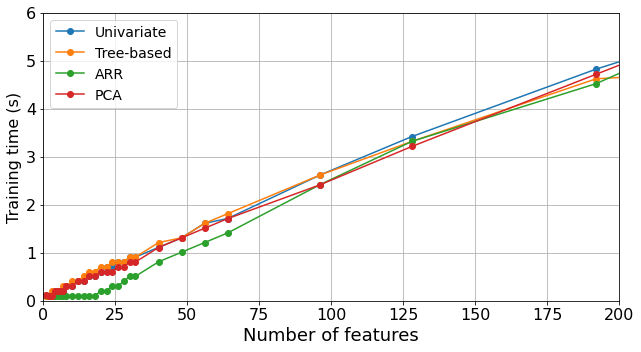

In [182]:
from matplotlib.pyplot import MultipleLocator
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist,r_pc_time,marker='o')
plt.plot(klist,r_tb_time,marker='o')
plt.plot(klist,r_arr_time,marker='o')
plt.plot(klist,r_pca_time,marker='o')
font_size=18
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('Training time (s)', fontsize=font_size-2)
plt.legend(('Univariate','Tree-based',
            'ARR','PCA'), loc = 2, shadow=False, fancybox=True, fontsize=font_size-4)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(5)
ax=plt.gca()
#ax.xaxis.set_major_locator(x_major_locator)
#ax.set_xscale("log",basex=2)
#ax.set_yscale("log",basey=2)
#ax.set_xticks([1,2,4,8,16,32,64,128,256,512,1024])
ax.set_xlim(0,200)
ax.set_ylim(0,6)

plt.grid()
plt.savefig("./Fig/periodic_time1.png",dpi=300,bbox_inches='tight')

In [86]:
X_train_arr.shape

(10136, 1746)

In [87]:
X_test_arr.shape

(4345, 1746)

In [154]:
print(r_pc_time)
print(r_tb_time)
print(r_arr_time)
print(r_pca_time)

[0.11025094985961914, 0.1082301139831543, 0.10823488235473633, 0.20908141136169434, 0.20855498313903809, 0.20871615409851074, 0.20869970321655273, 0.308868408203125, 0.3095700740814209, 0.40948486328125, 0.4098384380340576, 0.5100200176239014, 0.5096621513366699, 0.6101195812225342, 0.7109758853912354, 0.7108662128448486, 0.8107385635375977, 0.8110721111297607, 0.911362886428833, 0.9114270210266113, 1.1128308773040771, 1.31304931640625, 1.6141669750213623, 1.7144603729248047, 2.61845326423645, 3.4223780632019043, 4.827849626541138, 6.042173147201538, 9.280692338943481, 15.102791786193848]
[0.10915637016296387, 0.10806560516357422, 0.2085425853729248, 0.2087094783782959, 0.20837640762329102, 0.20828723907470703, 0.30906009674072266, 0.3091254234313965, 0.4091644287109375, 0.4091935157775879, 0.509434700012207, 0.6099522113800049, 0.6097030639648438, 0.7102608680725098, 0.7101824283599854, 0.8104884624481201, 0.810936450958252, 0.8108189105987549, 0.9118568897247314, 0.9116325378417969, 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


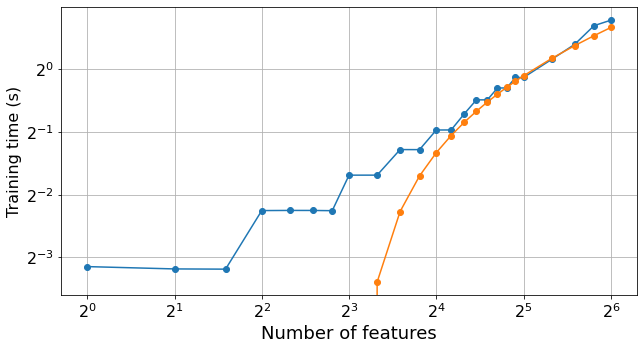

In [114]:
y = np.sqrt(klist)/5 
y2 = [_**(0.3)-1.9 for _ in klist]
from matplotlib.pyplot import MultipleLocator
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist,r_pc_time,marker='o')
#plt.plot(klist,y,marker='o')
plt.plot(klist,y2,marker='o')
# plt.plot(klist,r_tb_time,marker='o')
# plt.plot(klist,r_arr_time,marker='o')
# plt.plot(klist,r_pca_time,marker='o')
font_size=18
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('Training time (s)', fontsize=font_size-2)
#plt.legend(('Univariate','Tree-based',
#            'ARR','PCA'), loc = 2, shadow=False, fancybox=True, fontsize=font_size-4)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(5)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.set_xscale("log",basex=2)
ax.set_yscale("log",basey=2)
plt.grid()
#plt.savefig("./Fig/periodic_time.png",dpi=300,bbox_inches='tight')

In [155]:
print(r_pc_nmae)
print(r_tb_nmae)
print(r_arr_nmae)
print(r_pca_nmae)

[0.02688426717409696, 0.02984268461519349, 0.025493544932640083, 0.025319259850260286, 0.025077256468138603, 0.02518787797931604, 0.024701703373378667, 0.024775847785562903, 0.025019769258031444, 0.024789913863662763, 0.024399296137638686, 0.024274376145996528, 0.02427880955102306, 0.024392776825804364, 0.024560707781685464, 0.02430176365262376, 0.02454773127724111, 0.024285201993284128, 0.024092596138741918, 0.02406062562294787, 0.024498156477594225, 0.023719229303553215, 0.023665173409733623, 0.023353230647000057, 0.02310143721762286, 0.023169676603508865, 0.023024969316238028, 0.022975019786791975, 0.02263993578367048, 0.022542296162522124]
[0.03155552253173212, 0.02856750790694559, 0.02764167958046594, 0.027137577144485954, 0.02703547862928472, 0.02685659298319877, 0.02695131665972863, 0.026925653321291154, 0.027208505211542448, 0.027373443139055834, 0.027216951493771416, 0.02696336733695661, 0.026834765249896378, 0.0269486810121776, 0.026597417685112396, 0.026616565493958112, 0.02

In [ ]:
# [1, 2,3, 4, 5,6,7,8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,     32,40,48,56,64,  96,128,192,256,512,1024]